In [1]:
import pandas as pd
import numpy as np
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate, train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')   #Dùng để không in ra warning
from matplotlib.widgets import Slider, Button
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
df1 = pd.read_csv('heart_disease_data/long_beach_va.csv', header = None)
df2 = pd.read_csv('heart_disease_data/hungarian.csv', header = None)
df3 = pd.read_csv('heart_disease_data/switzerland.csv', header = None)
df4 = pd.read_csv('heart_disease_data/cleveland.csv', header = None)
frames = [df1, df2, df3, df4]
df = pd.concat(frames)
# df = pd.read_csv('heart_disease_data/cleveland.csv', header = None)
# switzerland hungarian

In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0,2,1,3,1


In [4]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})

In [5]:
for name in df.columns:
    df[name].replace('?', np.NaN, inplace=True)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,4,140,260,0,1,112,1,3,2,NaN,NaN,1
1,44,male,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,male,4,132,218,0,1,140,1,1.5,3,NaN,NaN,1
3,55,male,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,male,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,male,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,male,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,female,2,130,236,0,2,174,0,0,2,1,3,1


- Dữ liệu có 920 dòng với 14 thuộc tính

In [7]:
df.shape

(920, 14)

In [8]:
num_row_dup = df.duplicated().sum()
num_row_dup

2

In [9]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
187,58,male,3,150,219,0,1,118,1,0,NaN,NaN,NaN,1
102,49,female,2,110,NaN,0,0,160,0,0,NaN,NaN,NaN,0


In [10]:
new_df = df.drop_duplicates()
new_df.shape

(918, 14)

In [11]:
new_df.duplicated().sum()

0

In [12]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,4,140,260,0,1,112,1,3,2,NaN,NaN,1
1,44,male,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,male,4,132,218,0,1,140,1,1.5,3,NaN,NaN,1
3,55,male,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,male,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [13]:
dtype = new_df.dtypes
dtype

age          int64
sex         object
cp           int64
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

In [14]:
print('sex: ', type(new_df.loc[0, 'sex']))
print('trestbps:', type(new_df.loc[0, 'trestbps']))
print('chol:', type(new_df.loc[0, 'chol']))
print('fbs:', type(new_df.loc[0, 'fbs']))
print('restecg:', type(new_df.loc[0, 'restecg']))
print('thalach:', type(new_df.loc[0, 'thalach']))
print('exang:', type(new_df.loc[0, 'exang']))
print('oldpeak:', type(new_df.loc[0, 'oldpeak']))
print('slope:', type(new_df.loc[0, 'slope']))
print('ca:', type(new_df.loc[0, 'ca']))
print('thal:', type(new_df.loc[0, 'thal']))

sex:  <class 'pandas.core.series.Series'>
trestbps: <class 'pandas.core.series.Series'>
chol: <class 'pandas.core.series.Series'>
fbs: <class 'pandas.core.series.Series'>
restecg: <class 'pandas.core.series.Series'>
thalach: <class 'pandas.core.series.Series'>
exang: <class 'pandas.core.series.Series'>
oldpeak: <class 'pandas.core.series.Series'>
slope: <class 'pandas.core.series.Series'>
ca: <class 'pandas.core.series.Series'>
thal: <class 'pandas.core.series.Series'>


In [15]:
converted_trestbps = new_df['trestbps'].astype(float)
converted_chol = new_df['chol'].astype(str).astype(float)
converted_fbs = new_df['fbs'].astype(float)
converted_restecg = new_df['restecg'].astype(float)
converted_thalach = new_df['thalach'].astype(float)
converted_exang = new_df['exang'].astype(float)
converted_oldpeak = new_df['oldpeak'].astype(float)
converted_slope = new_df['slope'].astype(float)
converted_ca = new_df['ca'].astype(float)
converted_thal = new_df['thal'].astype(float)
converted_df = pd.concat([new_df['age'], new_df['sex'], new_df['cp'],converted_trestbps,converted_chol,converted_fbs,converted_restecg,converted_thalach,converted_exang,converted_oldpeak,converted_slope,converted_ca,converted_thal, new_df['target']], axis=1)

In [16]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    int64  
 3   trestbps  859 non-null    float64
 4   chol      889 non-null    float64
 5   fbs       828 non-null    float64
 6   restecg   916 non-null    float64
 7   thalach   863 non-null    float64
 8   exang     863 non-null    float64
 9   oldpeak   856 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    918 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 127.6+ KB


## Tiền xử lý (tách các tập)

In [17]:
y_sr = converted_df['target']
X_df = converted_df.drop(columns= ['target'], axis=1)

In [18]:
train_X_df, temp_X_df, train_y_sr, temp_y_sr = train_test_split(X_df, y_sr, test_size=0.4, random_state=42)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(temp_X_df, temp_y_sr, test_size=0.5, random_state=42)

## Tập train

In [19]:
train_X_df.shape

(550, 13)

In [20]:
train_y_sr.shape

(550,)

## Tập validate

In [21]:
val_X_df.shape

(184, 13)

In [22]:
val_y_sr.shape

(184,)

## Tập test

In [23]:
test_X_df.shape

(184, 13)

In [24]:
test_y_sr.shape

(184,)

## Tính chất các cột categorical

In [25]:
train_X_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
264,52,male,4,160.0,246.0,0.0,1.0,82.0,1.0,4.0,2.0,NaN,NaN
235,48,male,4,160.0,329.0,0.0,0.0,92.0,1.0,1.5,2.0,NaN,NaN
163,69,male,4,NaN,289.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
49,41,male,2,120.0,295.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN
90,61,male,4,150.0,0.0,0.0,0.0,117.0,1.0,2.0,2.0,NaN,7.0


In [26]:
train_X_df.dtypes[train_X_df.dtypes != object]

age           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [27]:
train_X_df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,550.000000,550.000000,517.000000,537.000000,497.000000,549.000000,520.000000,520.000000,518.000000,383.000000,197.000000,263.000000
mean,53.654545,3.274545,132.119923,206.385475,0.181087,0.633880,137.413462,0.398077,0.919498,1.749347,0.710660,5.072243
std,9.610290,0.916896,18.188109,111.676482,0.385478,0.818814,25.909287,0.489973,1.122526,0.626503,0.975484,1.923764
min,29.000000,1.000000,94.000000,0.000000,0.000000,0.000000,67.000000,0.000000,-2.600000,1.000000,0.000000,3.000000
25%,47.000000,3.000000,120.000000,182.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,4.000000,130.000000,226.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,0.000000,6.000000
75%,60.000000,4.000000,140.000000,271.000000,0.000000,1.000000,157.250000,1.000000,1.575000,2.000000,1.000000,7.000000
max,77.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [28]:
new_df['target'].value_counts(normalize=True)*100

1    55.337691
0    44.662309
Name: target, dtype: float64

In [29]:
order = df['age'].sort_values().unique()
order

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77],
      dtype=int64)

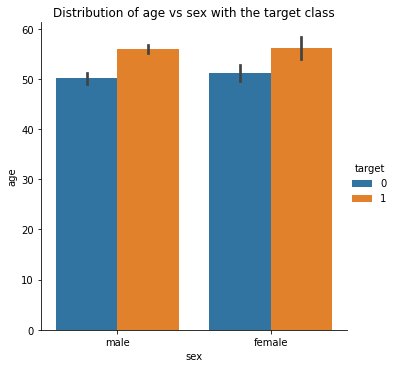

In [30]:
sns.catplot(kind = 'bar', data = converted_df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

converted_df['sex'] = converted_df.sex.map({'female': 0, 'male': 1})


In [31]:
numeric_cols_df = train_X_df.select_dtypes(exclude = 'object')

def missing_ratio(col):
    return col.isna().mean() * 100

def median(col):
    return col.quantile(0.5)

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
missing_ratio,0.0,0.0,6.0,2.363636,9.636364,0.181818,5.454545,5.454545,5.818182,30.363636,64.181818,52.181818
min,29.0,1.0,94.0,0.000000,0.000000,0.000000,67.000000,0.000000,-2.600000,1.000000,0.000000,3.000000
lower_quartile,47.0,3.0,120.0,182.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000
median,54.0,4.0,130.0,226.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,0.000000,6.000000
upper_quartile,60.0,4.0,140.0,271.000000,0.000000,1.000000,157.250000,1.000000,1.575000,2.000000,1.000000,7.000000
max,77.0,4.0,200.0,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [32]:
train_X_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
264,52,male,4,160.0,246.0,0.0,1.0,82.0,1.0,4.0,2.0,NaN,NaN
235,48,male,4,160.0,329.0,0.0,0.0,92.0,1.0,1.5,2.0,NaN,NaN
163,69,male,4,NaN,289.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
49,41,male,2,120.0,295.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN
90,61,male,4,150.0,0.0,0.0,0.0,117.0,1.0,2.0,2.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,50,male,4,144.0,349.0,0.0,2.0,120.0,1.0,1.0,1.0,NaN,7.0
71,45,female,2,130.0,237.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN
245,67,male,4,120.0,237.0,0.0,0.0,71.0,0.0,1.0,2.0,0.0,3.0
237,50,male,4,130.0,233.0,0.0,0.0,121.0,1.0,2.0,2.0,NaN,7.0


In [33]:
train_X_df.dtypes[train_X_df.dtypes == object]

sex    object
dtype: object

## Bảng mô tả

In [34]:
cate_cols_df = train_X_df.select_dtypes(include = 'object')

def value_counts(col):
    return dict(col.value_counts())

# tỉ lệ giá trị thiếu, số lượng giá trị duy nhất, thống kê giá trị duy nhất
category_stat = cate_cols_df.agg([missing_ratio, pd.Series.nunique, value_counts])
pd.set_option('display.max_colwidth', 10000)
category_stat

,sex
missing_ratio,0
nunique,2
value_counts,"{'male': 428, 'female': 122}"


## Tiền xử lý (tập huấn luyện)

In [35]:
train_X_df = train_X_df.drop(columns = ['ca', 'thal'], axis = 1)
val_X_df = val_X_df.drop(columns = ['ca', 'thal'], axis = 1)
test_X_df = test_X_df.drop(columns = ['ca', 'thal'], axis = 1)

In [54]:
num_cols = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope']
cat_col = ['sex']

num_imputer = Pipeline([
    ('impute1',SimpleImputer(missing_values = np.nan, strategy='mean')),
    ('scale1', StandardScaler())
])

cat_imputer = OneHotEncoder(handle_unknown = 'ignore', sparse = False) 

colTransform = ColumnTransformer(transformers = [('num', num_imputer, num_cols), ('cat', cat_imputer, cat_col)])
X_train = colTransform.fit_transform(train_X_df)
X_val = colTransform.fit_transform(val_X_df)
X_test = colTransform.fit_transform(test_X_df)

In [55]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9
0,1.582570e+00,0.359329,-4.946832e-01,0.447950,-2.201697,1.264639,2.830488,0.480064,0.0,1.0
1,1.582570e+00,1.112190,-4.946832e-01,-0.775555,-1.804375,1.264639,0.533388,0.480064,0.0,1.0
2,-1.613315e-15,0.749365,2.237068e+00,0.447950,0.000000,0.000000,0.000000,0.000000,0.0,1.0
3,-6.879689e-01,0.803789,-4.946832e-01,-0.775555,1.294734,-0.836359,-0.844871,0.000000,0.0,1.0
4,1.014935e+00,-1.872045,-4.946832e-01,-0.775555,-0.811071,1.264639,0.992808,0.480064,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
545,6.743544e-01,1.293603,-4.946832e-01,1.671456,-0.691874,1.264639,0.073968,-1.435191,0.0,1.0
546,-1.203342e-01,0.277693,-4.946832e-01,-0.775555,1.294734,-0.836359,-0.844871,0.000000,1.0,0.0
547,-6.879689e-01,0.277693,-4.946832e-01,-0.775555,-2.638750,-0.836359,0.073968,0.480064,0.0,1.0
548,-1.203342e-01,0.241410,-4.946832e-01,-0.775555,-0.652142,1.264639,0.992808,0.480064,0.0,1.0


## Xây dựng model

In [56]:
test_record = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'RMSE', 'MAE'])

## SVM

In [57]:
svr = SVR()
grid_values = {'C': [0.01, 0.1, 1, 10, 100],
              'kernel':['linear', 'rbf', 'poly'],
              'epsilon': [1, 1e-1, 1e-2, 1e-3, 1e-4]}
grid_svr_acc = GridSearchCV(svr, param_grid = grid_values, cv = 3, return_train_score=True)
grid_svr_acc.fit(X_train, train_y_sr)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True)

In [40]:
C=  grid_values['C']
kernel=  grid_values['kernel']
epsilon= grid_values['epsilon']
result_df = pd.DataFrame(grid_svr_acc.cv_results_)
Cs = result_df['param_C']
kernels = result_df['param_kernel']
epsilons = result_df['param_epsilon']

count = 0

for knl in kernel:
    test_score = result_df[result_df['param_kernel'] == knl]['mean_test_score']
    train_score = result_df[result_df['param_kernel'] == knl]['mean_train_score']
    train_score_df = pd.DataFrame(data=np.array(train_score).reshape(len(C), -1),
                             index=C, columns=epsilon)
    test_score_df = pd.DataFrame(data=np.array(test_score).reshape(len(C), -1), 
                             index=C, columns=epsilon)

    min_err = min(min(train_score), min(test_score))
    max_err = max(max(train_score), max(test_score))
    plt.figure(figsize=(10, 5))
    plt.suptitle(knl)
    plt.subplot(1, 2, 1)
    sns.heatmap(train_score_df,vmin=min_err, vmax=max_err,square=True, annot=True, 
              cbar=False, fmt='.4f', cmap='Reds')
    plt.title('train scores'); plt.xlabel('epsilon'); plt.ylabel('C');
    plt.subplot(1, 2, 2)
    sns.heatmap(test_score_df,vmin=min_err, vmax=max_err,square=True, annot=True, 
              cbar=False, fmt='.4f', cmap='Reds')
    plt.title('test scores'); plt.xlabel('epsilon'); plt.ylabel('C');
    plt.tight_layout()
    count = count + 1   
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [ ]:
print("Tham số tốt nhất: ",grid_svr_acc.best_params_)

In [ ]:
y_pred = grid_svr_acc.predict(X_val)
test_record = test_record.append({'Model':'SVR', 'R2': round(r2_score(val_y_sr, y_pred),5),
                                  'MSE':round(mean_squared_error(val_y_sr, y_pred),5),'RMSE':round(np.sqrt(mean_squared_error(val_y_sr, y_pred)),5),
                                  'MAE':round(mean_absolute_error(val_y_sr,y_pred),5)}, ignore_index=True)

In [ ]:
test_record[-1:]

## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, train_y_sr)

GaussianNB()

In [42]:
y_pred = classifier.predict(X_val)
test_record = test_record.append({'Model':'Naive Bayes', 'R2': round(r2_score(val_y_sr, y_pred),5),
                                  'MSE':round(mean_squared_error(val_y_sr, y_pred),5),'RMSE':round(np.sqrt(mean_squared_error(val_y_sr, y_pred)),5),
                                  'MAE':round(mean_absolute_error(val_y_sr,y_pred),5)}, ignore_index=True)

In [43]:
test_record[-1:]

,Model,R2,MSE,RMSE,MAE
0,Naive Bayes,0.12203,0.21739,0.46625,0.21739


## Logistic Regression

In [44]:
classifier = LogisticRegression()
classifier.fit(X_train, train_y_sr)

LogisticRegression()

In [45]:
y_pred = classifier.predict(X_val)
test_record = test_record.append({'Model':'Logistic Regression', 'R2': round(r2_score(val_y_sr, y_pred),5),
                                  'MSE':round(mean_squared_error(val_y_sr, y_pred),5),'RMSE':round(np.sqrt(mean_squared_error(val_y_sr, y_pred)),5),
                                  'MAE':round(mean_absolute_error(val_y_sr,y_pred),5)}, ignore_index=True)

In [46]:
test_record[-1:]

,Model,R2,MSE,RMSE,MAE
1,Logistic Regression,0.10008,0.22283,0.47204,0.22283


## Decision Tree

In [47]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, train_y_sr)

DecisionTreeClassifier()

In [48]:
y_pred = classifier.predict(X_val)
test_record = test_record.append({'Model':'Decision Tree', 'R2': round(r2_score(val_y_sr, y_pred),5),
                                  'MSE':round(mean_squared_error(val_y_sr, y_pred),5),'RMSE':round(np.sqrt(mean_squared_error(val_y_sr, y_pred)),5),
                                  'MAE':round(mean_absolute_error(val_y_sr,y_pred),5)}, ignore_index=True)

In [49]:
test_record[-1:]

,Model,R2,MSE,RMSE,MAE
2,Decision Tree,-0.22915,0.30435,0.55168,0.30435


## Random Forest

In [50]:
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, train_y_sr)

RandomForestClassifier(n_estimators=10)

In [51]:
y_pred = classifier.predict(X_val)
test_record = test_record.append({'Model':'Random Forest', 'R2': round(r2_score(val_y_sr, y_pred),5),
                                  'MSE':round(mean_squared_error(val_y_sr, y_pred),5),'RMSE':round(np.sqrt(mean_squared_error(val_y_sr, y_pred)),5),
                                  'MAE':round(mean_absolute_error(val_y_sr,y_pred),5)}, ignore_index=True)

In [52]:
test_record[-1:]

,Model,R2,MSE,RMSE,MAE
3,Random Forest,0.05619,0.2337,0.48342,0.2337
